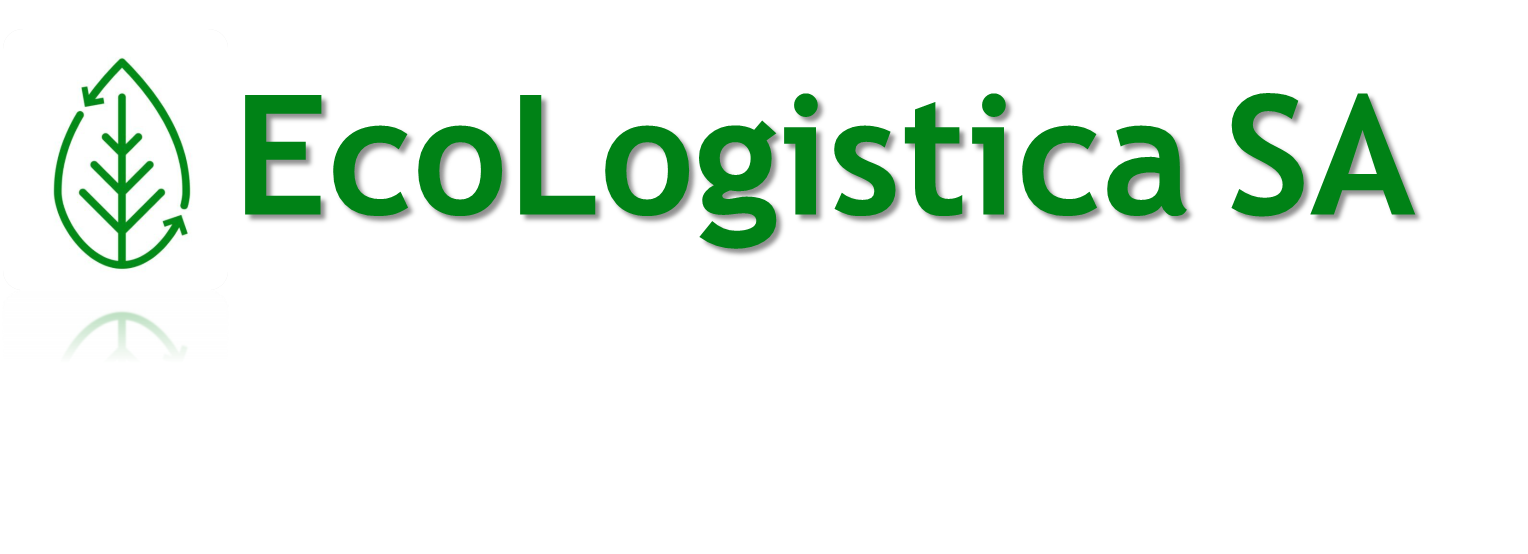

#  <span style="color:rgb(50,100,100);"><strong>&#128304; Desafío entregable #14: Desafío_EvaluaciónML &#128304;</strong></span>

### ⏩ **<u>FeatureSelection </u>** 

In [1]:

#Cargamos las librerías
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
import missingno as msno;
import warnings;
import datetime as dt;
import matplotlib.ticker as mtick;
warnings.filterwarnings("ignore");

# Configurar pandas para que muestre toda la tabla sin truncar los datos
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.set_option('display.max_columns', None);
pd.set_option('display.max_rows', None);
pd.set_option('display.width', None);
import locale;

# Establecemos el locale a español
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8');

In [2]:
from sklearn.metrics import mean_squared_error

In [3]:
ruta='F:\\Proyecto\\Proyecto_Coder_DS\\set de datos\\archivo_final.csv'
dfxx = pd.read_csv(ruta, delimiter='|',parse_dates=["fecha"])

In [4]:
# Seleccionar las columnas 'margen_ganancia_USD', 'precio' y 'total_costo'
columns = [ 'margen_ganancia_USD','precio_USD', 'total_costo_USD']
Q1 = dfxx[columns].quantile(0.25)
Q3 = dfxx[columns].quantile(0.75)
IQR = Q3 - Q1

In [5]:
# Filtrar los outliers
dfxx_sin_outliers = dfxx[~((dfxx[columns] < (Q1 - 1.5 * IQR)) | (dfxx[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Crear un DataFrame con los outliers
dfxx_solo_outliers = dfxx[((dfxx[columns] < (Q1 - 1.5 * IQR)) | (dfxx[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [6]:
#Seleccionamos las variables a procesar.
data=dfxx_sin_outliers[['id','cliente_nombre', 'anio_1','mes_1','dia_1', 'precio_USD','total_costo_USD','margen_ganancia_USD','zona_destino','provincia_destino','clasificacion del cliente']].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1789871 entries, 27 to 2168796
Data columns (total 11 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   id                         int64  
 1   cliente_nombre             object 
 2   anio_1                     int64  
 3   mes_1                      int64  
 4   dia_1                      int64  
 5   precio_USD                 float64
 6   total_costo_USD            float64
 7   margen_ganancia_USD        float64
 8   zona_destino               object 
 9   provincia_destino          object 
 10  clasificacion del cliente  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 163.9+ MB


In [7]:
# Combinar las columnas anio_1 y semana_1 en una columna de fecha
data['fecha'] = pd.to_datetime(data[['anio_1', 'mes_1', 'dia_1']].astype(str).agg('-'.join, axis=1))
data.head()

,id,cliente_nombre,anio_1,mes_1,dia_1,precio_USD,total_costo_USD,margen_ganancia_USD,zona_destino,provincia_destino,clasificacion del cliente,fecha
27,416848,SmartSolutions SRL,2020,1,3,0.000317,1.161746,-1.161429,CENTRO,SANTA FE,Pesimo,2020-01-03
28,416996,BioResearch SA,2020,1,3,0.317460,1.450794,-1.133333,CENTRO,BUENOS AIRES,Pesimo,2020-01-03
30,416892,MetalWorks,2020,1,3,0.000952,2.110794,-2.109841,NOA,SALTA,Pesimo,2020-01-03
31,417003,MetaIngenieria SRL,2020,1,3,0.000635,1.232540,-1.231905,CUYO,MENDOZA,Pesimo,2020-01-03
32,416544,X-Tech,2020,1,3,3.583968,1.111111,2.472857,AMBA,BUENOS AIRES,Excelente,2020-01-03


In [8]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['cliente_nombre','zona_destino','provincia_destino','clasificacion del cliente']
le = LabelEncoder()

for column in categorical_columns:
    data[column] = le.fit_transform(data[column])
    
data['fecha']=data['fecha'].map(dt.datetime.toordinal)   
data.head() 

,id,cliente_nombre,anio_1,mes_1,dia_1,precio_USD,total_costo_USD,margen_ganancia_USD,zona_destino,provincia_destino,clasificacion del cliente,fecha
27,416848,261,2020,1,3,0.000317,1.161746,-1.161429,1,19,3,737427
28,416996,33,2020,1,3,0.317460,1.450794,-1.133333,1,0,3,737427
30,416892,197,2020,1,3,0.000952,2.110794,-2.109841,4,15,3,737427
31,417003,187,2020,1,3,0.000635,1.232540,-1.231905,2,11,3,737427
32,416544,323,2020,1,3,3.583968,1.111111,2.472857,0,0,1,737427


In [9]:
#Generamos una reduccion del set para el analisis
data1=data.groupby(['fecha']).agg({'margen_ganancia_USD':'mean', 'precio_USD':'mean', 'id':'count','total_costo_USD':'mean'}).reset_index()
data1.head()

,fecha,margen_ganancia_USD,precio_USD,id,total_costo_USD
0,737426,0.825767,1.097841,1547,0.272075
1,737427,0.876642,1.218248,1667,0.341606
2,737430,1.177207,1.636560,1451,0.459353
3,737431,2.448203,3.323458,628,0.875255
4,737432,0.665898,0.913223,2748,0.247325


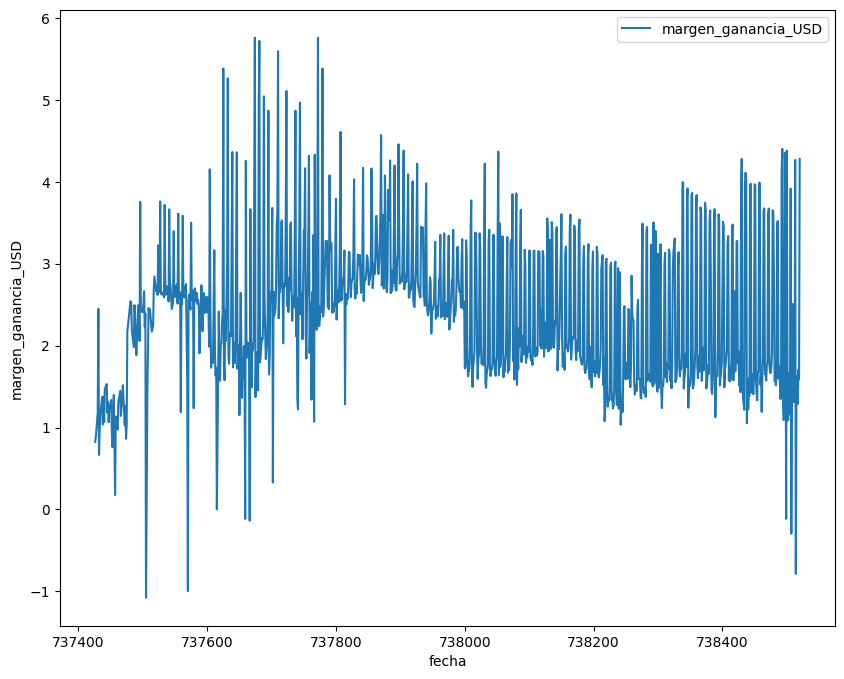

In [10]:
#Graficamos la variable objetivo a predecir. 
plt.figure(figsize = (10,8))
sns.lineplot(data1, x="fecha", y = "margen_ganancia_USD", label = 'margen_ganancia_USD')
plt.legend()
plt.show()

In [225]:
#Creamos el set de entrenamiento y testeo
from sklearn.model_selection import train_test_split
X=data1.fecha.values
X=X.reshape(-1,1)
y=data1.margen_ganancia_USD.values
y=y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# **1 - LinearRegression**

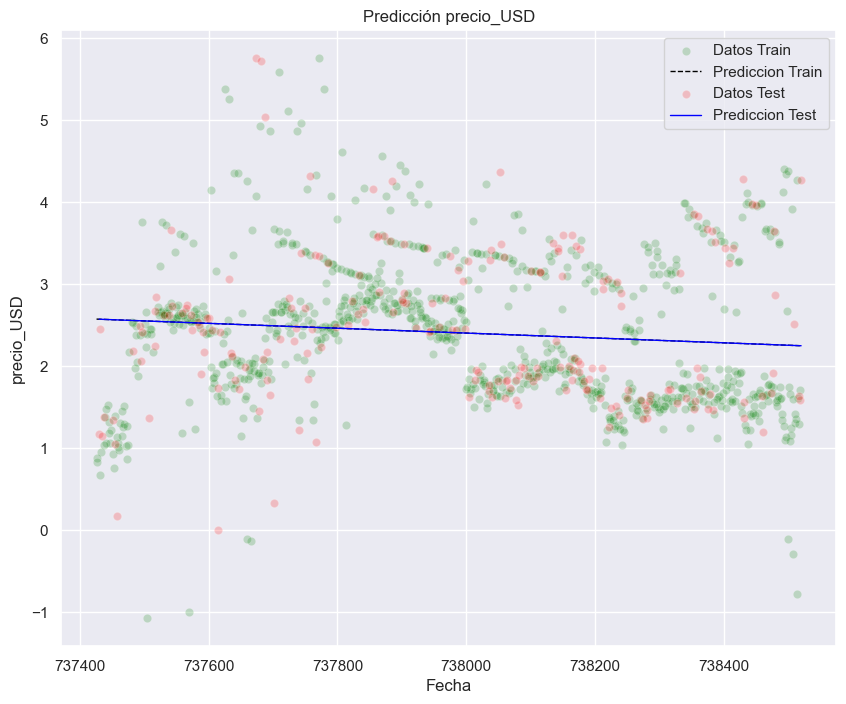

Error en datos de train: 0.7805752981770707
Error en datos de test: 0.8237738017823583


In [226]:
from sklearn.linear_model import LinearRegression

# Ajustar los parámetros para evitar el error de Overflow
plt.rcParams['agg.path.chunksize'] = 1000
plt.rcParams['path.simplify_threshold'] = 1.0

model = LinearRegression(fit_intercept=True)
model.fit(X, y)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
plt.figure(figsize = (10,8))
sns.set_theme()

sns.scatterplot(x=X_train.squeeze(), y=y_train.squeeze(), color='green', alpha=0.2, label='Datos Train')
sns.lineplot(x=X_train.squeeze(), y=y_train_pred.squeeze(), color='black', linewidth=1.0, linestyle='--', label='Prediccion Train')

sns.scatterplot(x=X_test.squeeze(), y=y_test.squeeze(), color='red', linewidth=1.0, alpha=0.2, label='Datos Test')
sns.lineplot(x=X_test.squeeze(), y=y_test_pred.squeeze(), color='blue', linewidth=1.0, label='Prediccion Test')


#plt.yscale('log')
plt.xlabel("Fecha")
plt.ylabel("precio_USD")
plt.title("Predicción precio_USD")

plt.legend()
plt.show()

print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred))

lr_test_mse = mean_squared_error(y_test, y_test_pred)
lr_train_mse = mean_squared_error(y_train, y_train_pred)

♦ como podemos obserbar los datos de prueba en la **LinearRegressionLinearRegression** sugieren que el modelo de regresión lineal tiene un rendimiento moderado en el conjunto de entrenamiento y un rendimiento ligeramente mejor en el conjunto de prueba.

# **2 - KNeighborsRegressor**

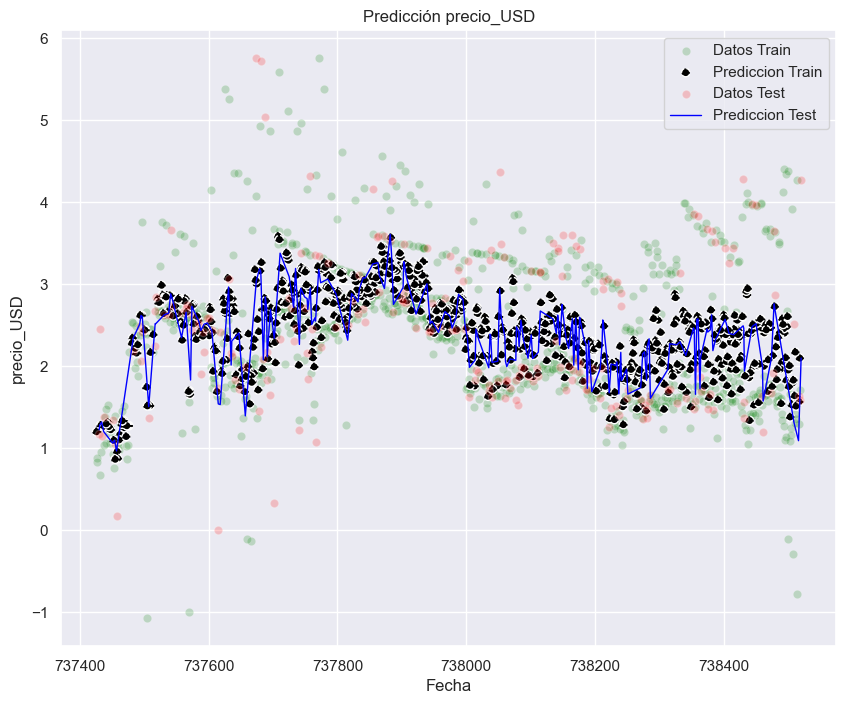

Error en datos de train: 0.4934285200470538
Error en datos de test: 0.5248496997765503


In [227]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X, y)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
plt.figure(figsize = (10,8))
sns.set_theme()

sns.scatterplot(x=X_train.squeeze(), y=y_train.squeeze(), color='green', alpha=0.2, label='Datos Train')
sns.scatterplot(x=X_train.squeeze(), y=y_train_pred.squeeze(), color='black', linewidth=1.0, linestyle='--', label='Prediccion Train')

sns.scatterplot(x=X_test.squeeze(), y=y_test.squeeze(), color='red', linewidth=1.0, alpha=0.2, label='Datos Test')
sns.lineplot(x=X_test.squeeze(), y=y_test_pred.squeeze(), color='blue', linewidth=1.0, label='Prediccion Test')

plt.xlabel("Fecha")
plt.ylabel("precio_USD")
plt.title("Predicción precio_USD")
#plt.yscale('log')


plt.legend()
plt.show()

print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred))

knr_test_mse = mean_squared_error(y_test, y_test_pred)
knr_train_mse = mean_squared_error(y_train, y_train_pred)

♦ los datos de prueba sugieren que el modelo de regresión con **KNeighborsRegressor** tiene un rendimiento moderado en el conjunto de entrenamiento y un rendimiento ligeramente mejor en el conjunto de prueba.

# **3 - RandomForestRegressor**

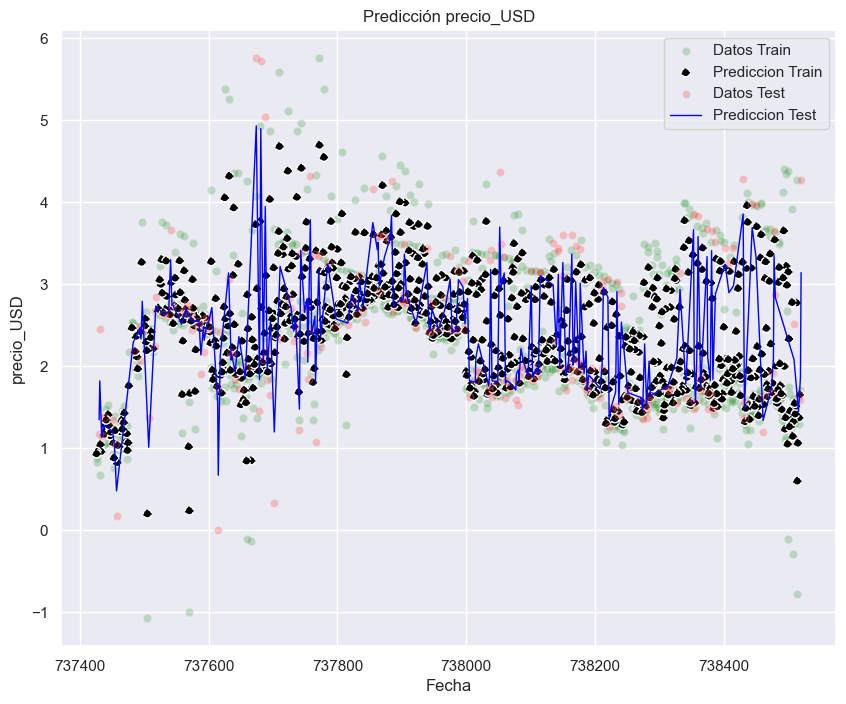

Error en datos de train: 0.11143638306594628
Error en datos de test: 0.09865274999377653


In [228]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
plt.figure(figsize = (10,8))
sns.set_theme()

sns.scatterplot(x=X_train.squeeze(), y=y_train.squeeze(), color='green', alpha=0.2, label='Datos Train')
sns.scatterplot(x=X_train.squeeze(), y=y_train_pred.squeeze(), color='black', linewidth=1.0, linestyle='--', label='Prediccion Train')

sns.scatterplot(x=X_test.squeeze(), y=y_test.squeeze(), color='red', linewidth=1.0, alpha=0.2, label='Datos Test')
sns.lineplot(x=X_test.squeeze(), y=y_test_pred.squeeze(), color='blue', linewidth=1.0, label='Prediccion Test')

plt.xlabel("Fecha")
plt.ylabel("precio_USD")
plt.title("Predicción precio_USD")
#plt.yscale('log')


plt.legend()
plt.show()

print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred))

rfr_test_mse = mean_squared_error(y_train, y_train_pred)
rfr_train_mse = mean_squared_error(y_test, y_test_pred)

♦ los datos de prueba sugieren que el modelo de regresión con **RandomForestRegressor** tiene un buen rendimiento en ambos conjuntos de datos. El MSE más bajo en el conjunto de prueba indica que el modelo generaliza bien y tiene una capacidad de predicción precisa.

# **4 - XGBRegressor**

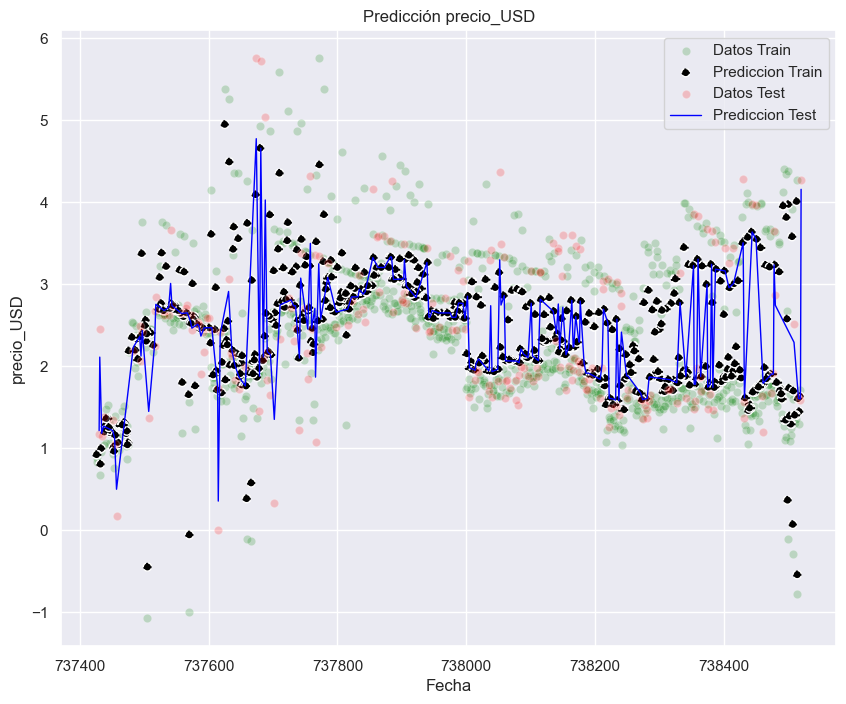

Error en datos de train: 0.12443578875387669
Error en datos de test: 0.1395894962586623


In [229]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X, y)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
plt.figure(figsize = (10,8))
sns.set_theme()

sns.scatterplot(x=X_train.squeeze(), y=y_train.squeeze(), color='green', alpha=0.2, label='Datos Train')
sns.scatterplot(x=X_train.squeeze(), y=y_train_pred.squeeze(), color='black', linewidth=1.0, linestyle='--', label='Prediccion Train')

sns.scatterplot(x=X_test.squeeze(), y=y_test.squeeze(), color='red', linewidth=1.0, alpha=0.2, label='Datos Test')
sns.lineplot(x=X_test.squeeze(), y=y_test_pred.squeeze(), color='blue', linewidth=1.0, label='Prediccion Test')

plt.xlabel("Fecha")
plt.ylabel("precio_USD")
plt.title("Predicción precio_USD")
#plt.yscale('log')


plt.legend()
plt.show()

print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred))

xgb_test_mse = mean_squared_error(y_train, y_train_pred)
xgb_train_mse = mean_squared_error(y_test, y_test_pred)

♦  los datos de prueba sugieren que el modelo de regresión con **XGBRegressor** tiene un rendimiento razonable en ambos conjuntos de datos. El MSE más bajo en el conjunto de prueba indica que el modelo generaliza bien y tiene una capacidad de predicción precisa.

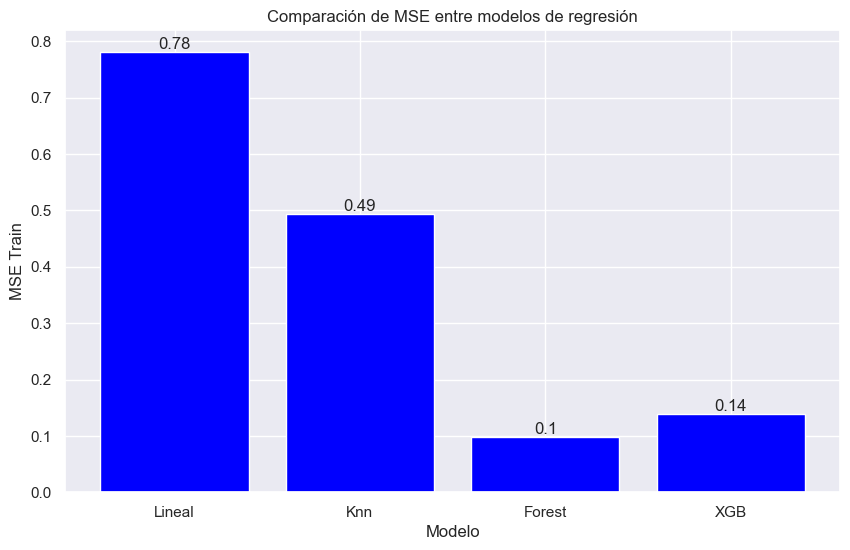

In [230]:
valores = [lr_train_mse, knr_train_mse, rfr_train_mse, xgb_train_mse]

nombres = ['Lineal', 'Knn', 'Forest', 'XGB']

plt.figure(figsize=(10, 6))
plt.bar(nombres, valores, color='blue')

plt.xlabel('Modelo')
plt.ylabel('MSE Train')
plt.title('Comparación de MSE entre modelos de regresión')

for i, value in enumerate(valores):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()

♦ basado en el MSE en el conjunto de entrenamiento, los modelos **RandomForestRegressor** y **XGBRegressor** parecen ser los más prometedores para la tarea de regresión.

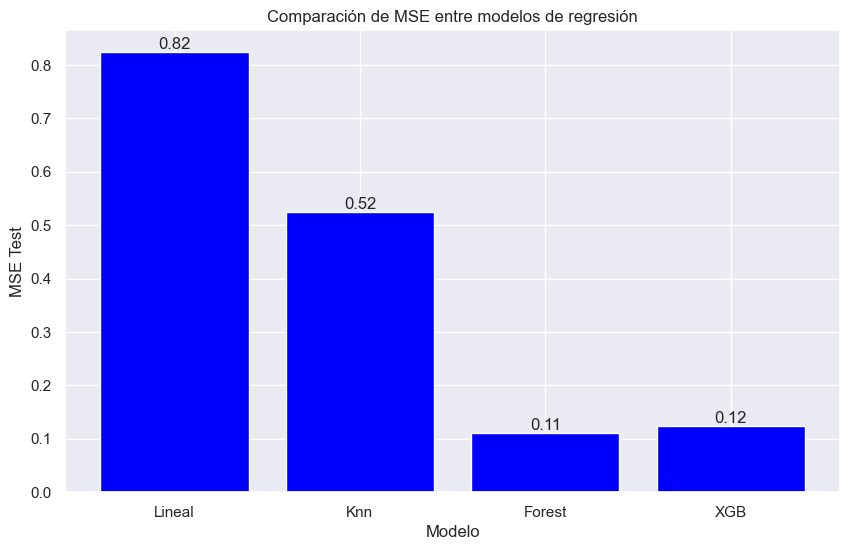

In [231]:
valores = [lr_test_mse, knr_test_mse, rfr_test_mse, xgb_test_mse]

nombres = ['Lineal', 'Knn', 'Forest', 'XGB']

plt.figure(figsize=(10, 6))
plt.bar(nombres, valores, color='blue')

plt.xlabel('Modelo')
plt.ylabel('MSE Test')
plt.title('Comparación de MSE entre modelos de regresión')

for i, value in enumerate(valores):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()

♦ basándonos en los valores de MSE en el conjunto de prueba, el modelo **RandomForestRegressor** parece tener el mejor rendimiento, seguido por el modelo **XGBRegressor**. Estos modelos demuestran una mejor capacidad para generalizar y predecir los valores de manera más precisa en comparación con el modelo **lineal** y el modelo **KNeighborsRegressor**

In [232]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_test_pred)
print("MAE:", mae)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_pred)
print("R^2:", r2)

MSE: 0.1395894962586623
RMSE: 0.3736167772713938
MAE: 0.2874064371224325
R^2: 0.8287570147189652


♦  las métricas de evaluación indican que el modelo tiene un buen rendimiento en términos de precisión y capacidad de explicar la variabilidad en los datos. 

In [233]:
data2=data1.copy()
data2.head()

,fecha,margen_ganancia_USD,precio_USD,id,total_costo_USD
0,737426,0.825767,1.097841,1547,0.272075
1,737427,0.876642,1.218248,1667,0.341606
2,737430,1.177207,1.636560,1451,0.459353
3,737431,2.448203,3.323458,628,0.875255
4,737432,0.665898,0.913223,2748,0.247325


In [292]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBRegressor

# Paso 1: Preparar los datos
data2_clean = data2.dropna(subset=['margen_ganancia_USD'])
X = data2_clean.drop('margen_ganancia_USD', axis=1)  # Características
y = data2_clean['margen_ganancia_USD']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Paso 2: Aplicar PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Normalizar características
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
loadings = pd.DataFrame(pca.components_.T, index=X.columns, columns=['PC1', 'PC2'])
relevant_variables = loadings.abs().sort_values(by='PC1', ascending=False).head(5).index

# Paso 3: Construir y entrenar los modelos de regresión
lr_model = LinearRegression()
lr_model.fit(X_train[relevant_variables], y_train)

knn_model = KNeighborsRegressor()
knn_model.fit(X_train[relevant_variables], y_train)

forest_model = RandomForestRegressor()
forest_model.fit(X_train[relevant_variables], y_train)

xgb_model = XGBRegressor()
xgb_model.fit(X_train[relevant_variables], y_train)

# Paso 4: Realizar predicciones y evaluar los modelos
X_test_pca = pca.transform(scaler.transform(X_test))

y_pred_lr = lr_model.predict(X_test[relevant_variables])
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

y_pred_knn = knn_model.predict(X_test[relevant_variables])
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

y_pred_forest = forest_model.predict(X_test[relevant_variables])
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

y_pred_xgb = xgb_model.predict(X_test[relevant_variables])
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Resultados Linear Regression:")
print(f"Error cuadrático medio: {mse_lr}")
print(f"Coeficiente de determinación: {r2_lr}\n")

print("Resultados KNN:")
print(f"Error cuadrático medio: {mse_knn}")
print(f"Coeficiente de determinación: {r2_knn}\n")

print("Resultados Random Forest:")
print(f"Error cuadrático medio: {mse_forest}")
print(f"Coeficiente de determinación: {r2_forest}\n")

print("Resultados XGBoost:")
print(f"Error cuadrático medio: {mse_xgb}")
print(f"Coeficiente de determinación: {r2_xgb}")


Resultados Linear Regression:
Error cuadrático medio: 5.0920994023113807e-26
Coeficiente de determinación: 1.0

Resultados KNN:
Error cuadrático medio: 0.2446334157366554
Coeficiente de determinación: 0.6615750484161582

Resultados Random Forest:
Error cuadrático medio: 0.012268405928434263
Coeficiente de determinación: 0.9830279331634285

Resultados XGBoost:
Error cuadrático medio: 0.008256522127880845
Coeficiente de determinación: 0.9885779581952658


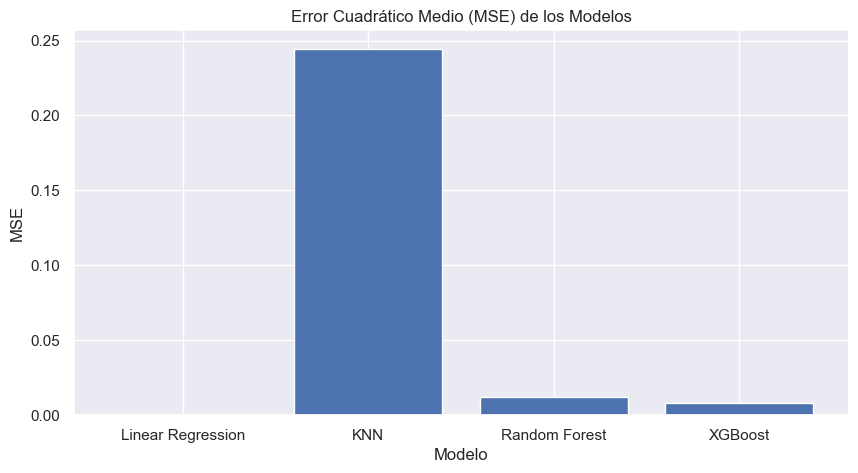

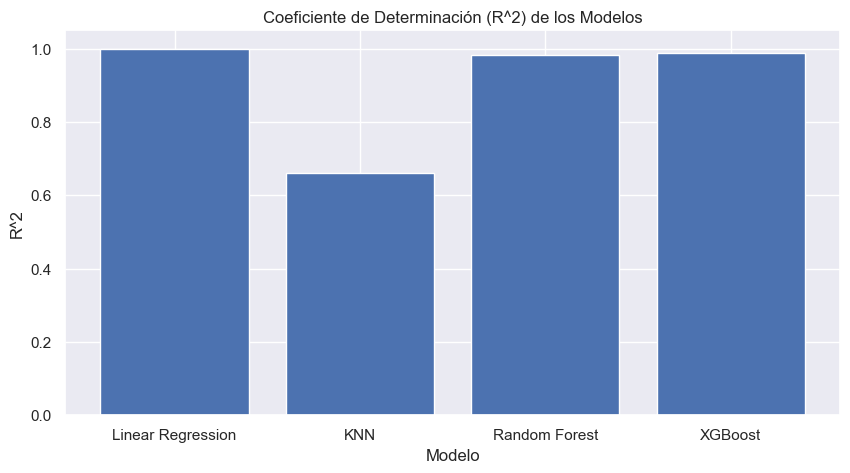

In [293]:
# Etiquetas de los modelos
models = ['Linear Regression', 'KNN', 'Random Forest', 'XGBoost']

# Valores de los errores cuadráticos medios (MSE)
mse_values = [mse_lr, mse_knn, mse_forest, mse_xgb]

# Valores de los coeficientes de determinación (R^2)
r2_values = [r2_lr, r2_knn, r2_forest, r2_xgb]

# Graficar MSE
plt.figure(figsize=(10, 5))
plt.bar(models, mse_values)
plt.title('Error Cuadrático Medio (MSE) de los Modelos')
plt.xlabel('Modelo')
plt.ylabel('MSE')
plt.show()

# Graficar R^2
plt.figure(figsize=(10, 5))
plt.bar(models, r2_values)
plt.title('Coeficiente de Determinación (R^2) de los Modelos')
plt.xlabel('Modelo')
plt.ylabel('R^2')
plt.show()


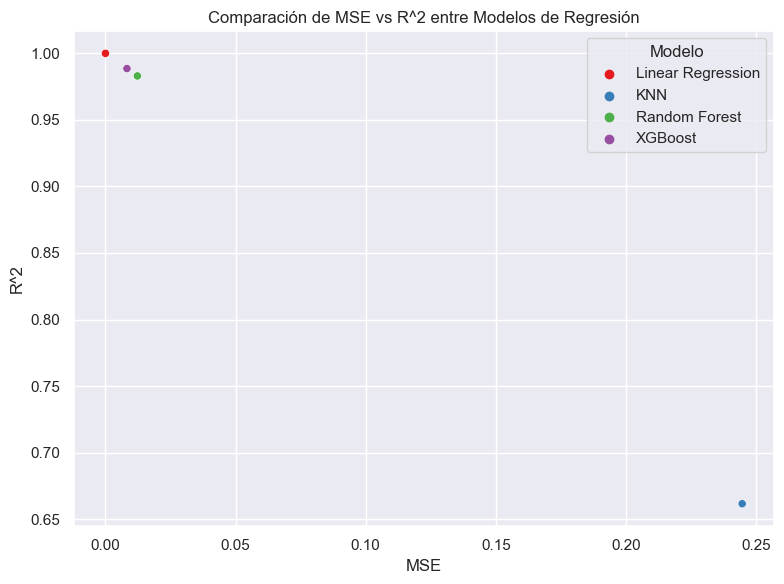

In [294]:
import seaborn as sns

# Crear un DataFrame con los resultados
results = pd.DataFrame({'Modelo': models, 'MSE': mse_values, 'R^2': r2_values})

# Graficar MSE vs R^2 utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results, x='MSE', y='R^2', hue='Modelo', palette='Set1')
plt.title('Comparación de MSE vs R^2 entre Modelos de Regresión')
plt.xlabel('MSE')
plt.ylabel('R^2')
plt.grid(True)
plt.tight_layout()

plt.show()


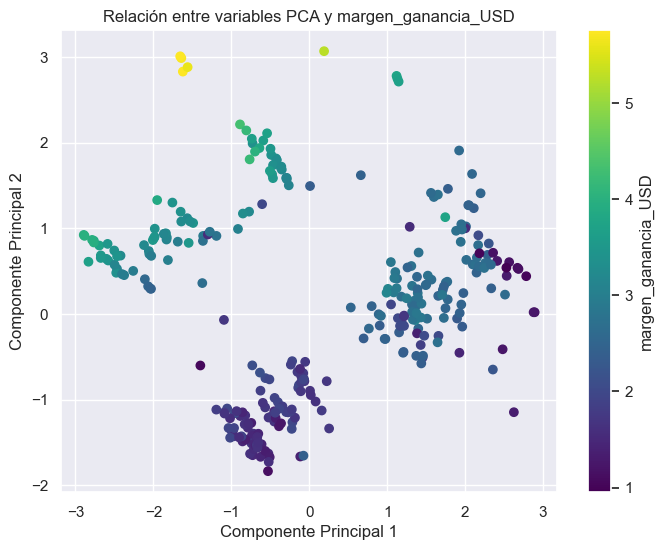

In [295]:
# Graficar las variables seleccionadas por PCA y la variable objetivo
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis')
plt.colorbar(scatter, label='margen_ganancia_USD')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Relación entre variables PCA y margen_ganancia_USD')
plt.show()

♦ el modelo de regresión lineal parece ajustarse perfectamente a los datos, ya que el MSE es extremadamente bajo (casi cero) y el coeficiente de determinación es 1.0, lo que indica que el modelo explica la totalidad de la variabilidad de la variable objetivo

In [262]:
data3=dfxx_sin_outliers[['id','cliente_nombre', 'anio_1','mes_1','dia_1', 
                        'precio_USD','total_costo_USD','margen_ganancia_USD',
                        'zona_destino','provincia_destino','clasificacion del cliente']].copy()
data3.head()

,id,cliente_nombre,anio_1,mes_1,dia_1,precio_USD,total_costo_USD,margen_ganancia_USD,zona_destino,provincia_destino,clasificacion del cliente
27,416848,SmartSolutions SRL,2020,1,3,0.000317,1.161746,-1.161429,CENTRO,SANTA FE,Pesimo
28,416996,BioResearch SA,2020,1,3,0.317460,1.450794,-1.133333,CENTRO,BUENOS AIRES,Pesimo
30,416892,MetalWorks,2020,1,3,0.000952,2.110794,-2.109841,NOA,SALTA,Pesimo
31,417003,MetaIngenieria SRL,2020,1,3,0.000635,1.232540,-1.231905,CUYO,MENDOZA,Pesimo
32,416544,X-Tech,2020,1,3,3.583968,1.111111,2.472857,AMBA,BUENOS AIRES,Excelente


In [263]:
# Combinar las columnas anio_1 y semana_1 en una columna de fecha
data3['fecha'] = pd.to_datetime(data3[['anio_1', 'mes_1', 'dia_1']].astype(str).agg('-'.join, axis=1))
data3.head()

from sklearn.preprocessing import LabelEncoder

categorical_columns = ['cliente_nombre','zona_destino','provincia_destino','clasificacion del cliente']
le = LabelEncoder()

for column in categorical_columns:
    data3[column] = le.fit_transform(data3[column])
    
data3['fecha']=data3['fecha'].map(dt.datetime.toordinal)   
data3.head() 

,id,cliente_nombre,anio_1,mes_1,dia_1,precio_USD,total_costo_USD,margen_ganancia_USD,zona_destino,provincia_destino,clasificacion del cliente,fecha
27,416848,261,2020,1,3,0.000317,1.161746,-1.161429,1,19,3,737427
28,416996,33,2020,1,3,0.317460,1.450794,-1.133333,1,0,3,737427
30,416892,197,2020,1,3,0.000952,2.110794,-2.109841,4,15,3,737427
31,417003,187,2020,1,3,0.000635,1.232540,-1.231905,2,11,3,737427
32,416544,323,2020,1,3,3.583968,1.111111,2.472857,0,0,1,737427


In [264]:
#Generamos una reduccion del set para el analisis
data3a=data3.groupby(['fecha']).agg({'margen_ganancia_USD':'mean', 'precio_USD':'mean', 'id':'count','total_costo_USD':'mean'}).reset_index()
data3a.head()

,fecha,margen_ganancia_USD,precio_USD,id,total_costo_USD
0,737426,0.825767,1.097841,1547,0.272075
1,737427,0.876642,1.218248,1667,0.341606
2,737430,1.177207,1.636560,1451,0.459353
3,737431,2.448203,3.323458,628,0.875255
4,737432,0.665898,0.913223,2748,0.247325


In [265]:
data3a.shape

(1055, 5)

In [266]:
x = data3a.fecha.values.reshape(-1, 1)
t = data3a.margen_ganancia_USD.values.reshape(-1, 1)

# ¡Ahora la función que queremos modelizar no es más linear en la variable! Generamos puntos a partir de ella
def ground_truth(t):
    return 4 * x + 2 * np.sin(x*6)

# Fijamos la semilla aleatoria, por si queremos reproducir exactamente los mismos resultados en otro momento
np.random.seed(42)

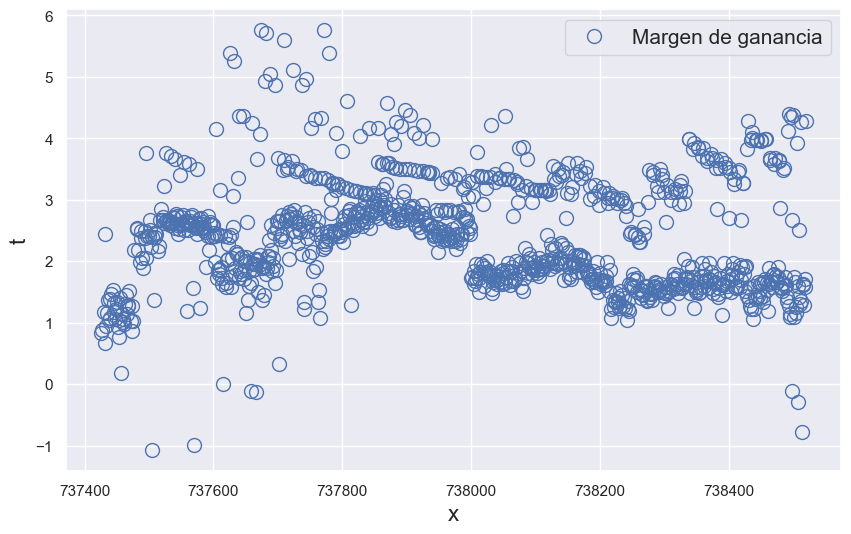

In [267]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(x, t, 'o', ms=10, mfc='None', label='Margen de ganancia')
ax.legend(loc=1, fontsize=15)
    
plt.xlabel('x', fontsize=16)
plt.ylabel('t', fontsize=16)
plt.show()

In [268]:
from sklearn.preprocessing import PolynomialFeatures

M = 3

# generamos la matriz de diseño para regresión polinomial de tercer orden (función cúbica)
poly = PolynomialFeatures(M)
x_poly = poly.fit_transform(x)

In [269]:
print(np.round(x_poly, 4))

[[1.00000000e+00 7.37426000e+05 5.43797105e+11 4.01010124e+17]
 [1.00000000e+00 7.37427000e+05 5.43798580e+11 4.01011756e+17]
 [1.00000000e+00 7.37430000e+05 5.43803005e+11 4.01016650e+17]
 ...
 [1.00000000e+00 7.38518000e+05 5.45408836e+11 4.02794243e+17]
 [1.00000000e+00 7.38519000e+05 5.45410313e+11 4.02795879e+17]
 [1.00000000e+00 7.38520000e+05 5.45411790e+11 4.02797515e+17]]


In [270]:
#t = np.array(data3a.margen_ganancia_USD)

In [271]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=False)
lr.fit(x_poly, t)

LinearRegression(fit_intercept=False)

In [272]:
# Miramos los coeficientes

print(*lr.coef_)

[ 2.29455503e-21  1.12884632e-15  4.16555403e-10 -5.58458546e-16]


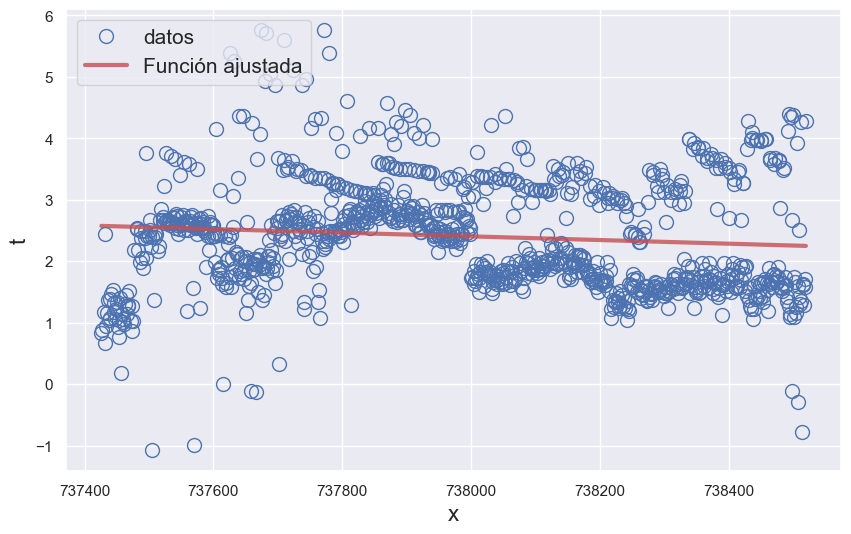

El MSE es: 0.79


In [273]:
from sklearn.metrics import mean_squared_error


predictions = lr.predict(poly.transform(x_))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

x_ = data3a.fecha.values.reshape(-1, 1)
ax.plot(x, t, 'o', ms=10, mfc='None', label='datos')
#ax.plot(x_, ground_truth(x_), 'k-', lw=3, alpha=0.5, label='Función real')
ax.plot(x_, predictions, 'r-', lw=3, alpha=0.8, label='Función ajustada')
ax.legend(loc=2, fontsize=15)

#plt.yscale('log')
plt.xlabel('x', fontsize=16)
plt.ylabel('t', fontsize=16)
plt.show()

error = mean_squared_error(t, lr.predict(x_poly))
print(f"""El MSE es: {round(error, 2)}""")


In [274]:
predictions

array([[2.57409115],
       [2.57379444],
       [2.57290431],
       ...,
       [2.24911002],
       [2.24881152],
       [2.24851302]])

In [275]:
t

array([[0.82576661],
       [0.876642  ],
       [1.17720729],
       ...,
       [1.70485724],
       [1.58771699],
       [4.27770805]])

In [276]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def polynomial_regressor(M):
    pr = Pipeline([
        ('poly_features', PolynomialFeatures(degree=50)),
        ('regressor', LinearRegression(fit_intercept=False) )])
    return pr

In [277]:
pr = polynomial_regressor(3)
pr.fit(x, t)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=50)),
                ('regressor', LinearRegression(fit_intercept=False))])

In [278]:
error = mean_squared_error(t, pr.predict(x))

print(f"""El MSE es: {round(error,2)}""")

El MSE es: 0.79


In [279]:
pr.named_steps

{'poly_features': PolynomialFeatures(degree=50),
 'regressor': LinearRegression(fit_intercept=False)}

In [280]:
# Crea una lista de grado
degrees = range(1, 20)

# Inicializa listas
errors = []
models = []

# Itera en todos los grados
for M in degrees:
    print(f"Grado del polinomio: {M}")
    
    # Create polynomial model
    pr = polynomial_regressor(M)
    
    # Fit 
    pr.fit(x, t)
    
    # Evaluate errors
    error_n = mean_squared_error(t, pr.predict(x))
    print(f"""El MSE es: {round(error_n,2)}""")    
    # guarda el resultado en listas
    errors.append(error_n)
    models.append(pr)

Grado del polinomio: 1
El MSE es: 0.79
Grado del polinomio: 2
El MSE es: 0.79
Grado del polinomio: 3
El MSE es: 0.79
Grado del polinomio: 4
El MSE es: 0.79
Grado del polinomio: 5
El MSE es: 0.79
Grado del polinomio: 6
El MSE es: 0.79
Grado del polinomio: 7
El MSE es: 0.79
Grado del polinomio: 8
El MSE es: 0.79
Grado del polinomio: 9
El MSE es: 0.79
Grado del polinomio: 10
El MSE es: 0.79
Grado del polinomio: 11
El MSE es: 0.79
Grado del polinomio: 12
El MSE es: 0.79
Grado del polinomio: 13
El MSE es: 0.79
Grado del polinomio: 14
El MSE es: 0.79
Grado del polinomio: 15
El MSE es: 0.79
Grado del polinomio: 16
El MSE es: 0.79
Grado del polinomio: 17
El MSE es: 0.79
Grado del polinomio: 18
El MSE es: 0.79
Grado del polinomio: 19
El MSE es: 0.79


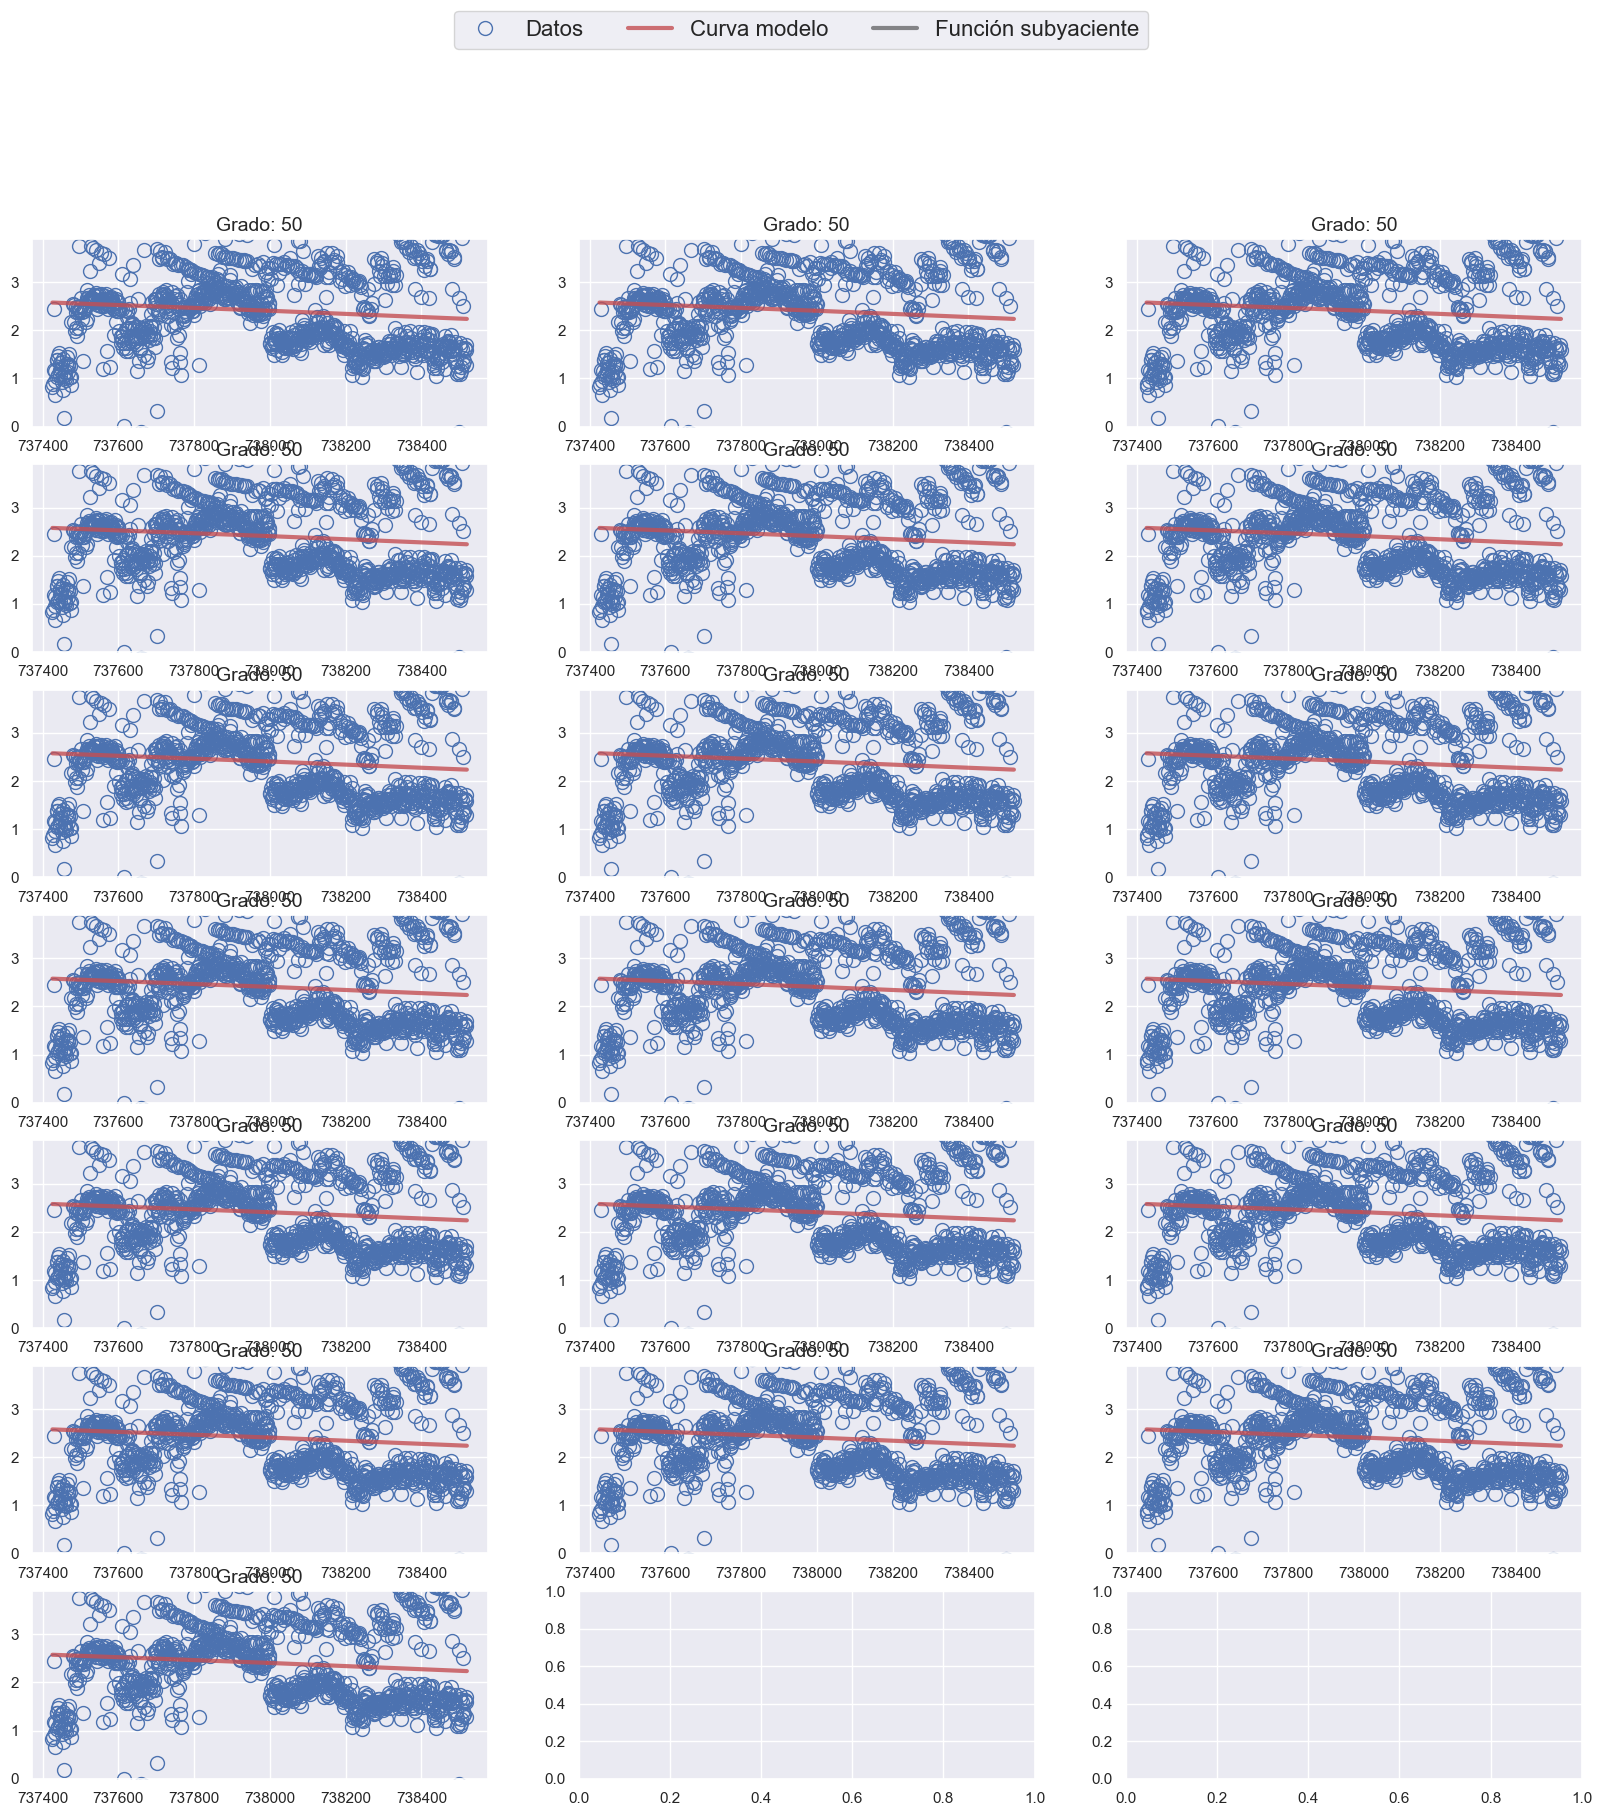

In [257]:
# Hace múltiples gráficas
ncolumns = 3

fig = plt.figure(figsize=(20, 20))

if M % ncolumns == 0: #len(models)
    extrarow = 0
else:
    extrarow = 1
        
axs = fig.subplots(ncols=ncolumns, nrows=int(np.floor(len(models)/ncolumns) + extrarow))

x_ = data3a.fecha.values.reshape(-1, 1)
for i, ax in zip(range(len(models)), axs.flatten()):
    ax.plot(x, t, 'o', ms=10, mfc='None', label='Datos')
    ax.plot(x_, models[i].predict(x_), 'r-', lw=3, alpha=0.8, label='Curva modelo')
    ax.plot(x_, ground_truth(x_), 'k-', lw=3, alpha=0.5, label='Función subyaciente')
    #
    ax.set_title('Grado: {}'.format(models[i]['poly_features'].degree), fontsize=14)
    #
    ax.set_ylim(0, 3.9)
    
# Make a single legend
handles, labels = ax.get_legend_handles_labels()
_ = fig.legend(handles, labels, loc='upper center', ncol=len(handles), 
               fontsize=16, borderaxespad=0.5)